In [1]:
####Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
raw_data = pd.read_csv (r'C:\Users\acer\Documents\JN\top_10000_1960-now.csv')

## Loading Meta Data
Chaecking the shape of the dataset

In [4]:
#### Shape of the dataset
print("In our dataset we have {0} number of rows and {1} columns ".format(raw_data.shape[0],raw_data.shape[1]))

In our dataset we have 9999 number of rows and 35 columns 


In [5]:
#### The datatype of the 35 columns:
raw_data.info()
## Out of 35 columns, 17 columns as Numerical, 17 are string/object and 1 column is boolean
## By glancing it we know column "Album Release Date" should be date as the name says but it is currently Object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

In [6]:
#### Converting the Object column to DataTime 
raw_data['Album Release Date']=pd.to_datetime(raw_data['Album Release Date'], errors='coerce')

In [7]:
#### Null value check in the columns 
raw_data.isnull().sum(axis=0) ###Checking column. axis=0 is the default option no need to set it explicitly
## We do see column "Album Genres" doesn't have any values i.e. 100% missing, this column can be dropped for now.  
## But we can check with the data provider why this is missing?

Track URI                  0
Track Name                 1
Artist URI(s)              2
Artist Name(s)             1
Album URI                  2
Album Name                 1
Album Artist URI(s)        2
Album Artist Name(s)       2
Album Release Date      1377
Album Image URL            4
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL       2897
Explicit                   0
Popularity                 0
ISRC                       3
Added By                   0
Added At                   0
Artist Genres            550
Danceability               2
Energy                     2
Key                        2
Loudness                   2
Mode                       2
Speechiness                2
Acousticness               2
Instrumentalness           2
Liveness                   2
Valence                    2
Tempo                      2
Time Signature             2
Album Genres            9999
Label                      6
Copyrights    

In [8]:
#### Null Value check in the rows
raw_data[raw_data.isnull().sum(axis=1)>raw_data.shape[1]-1]  ### Number of column in the dataset minus 1
## None of the row is completely missing

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights


In [9]:
#### Check if there are any duplicate rows in the data
sum(raw_data.duplicated())
## There are 48 columns which is repeated in the dataset, we can drop them

48

In [10]:
#### 5 records from top which are repeating in our dataset
raw_data[raw_data.duplicated()].head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
248,spotify:track:4DhbiXEuV7JxSR0wuqetTa,Free Ride,spotify:artist:7j9PMegEgVN1fNp8NZXNCI,The Edgar Winter Group,spotify:album:4CNEJF5wYGqhOYEKq8ciu8,They Only Come Out At Night,spotify:artist:3UNrI3SG1l2ezKikxQ2zuk,Edgar Winter,1972-11-30,https://i.scdn.co/image/ab67616d0000b27309a018...,...,0.0597,0.2900,0.003220,0.1890,0.814,124.204,4.0,NaN,Epic,P (P) 1972 SONY BMG MUSIC ENTERTAINMENT
1096,spotify:track:4vp2J1l5RD4gMZwGFLfRAu,I Gotta Feeling,spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,spotify:album:36fdxiOzdlmsrHgGcfvqUJ,THE E.N.D. (THE ENERGY NEVER DIES),spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,2009-01-01,https://i.scdn.co/image/ab67616d0000b273f051a3...,...,0.0265,0.0873,0.000000,0.5090,0.610,127.960,4.0,NaN,Interscope,"C © 2009 Interscope, P ℗ 2009 Interscope"
1493,spotify:track:2dCmGcEOQrMQhMMS8Vj7Ca,Super Freak,spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,spotify:album:2DBFUBBqJQvfXpodPi2WP5,Street Songs (Deluxe Edition),spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,1981-04-07,https://i.scdn.co/image/ab67616d0000b27317f9e7...,...,0.0531,0.2200,0.000000,0.0575,0.962,132.446,4.0,NaN,Motown,"C © 1981 Motown Records, a Division of UMG Rec..."
1582,spotify:track:7Dm3dV3WPNdTgxoNY7YFnc,The Chain - 2004 Remaster,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,spotify:album:1bt6q2SruMsBtcerNVtpZB,Rumours,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,1977-02-04,https://i.scdn.co/image/ab67616d0000b27357df7c...,...,0.0524,0.0517,0.000066,0.0781,0.637,151.796,4.0,NaN,Rhino/Warner Records,"C © 2004 Warner Records Inc., P ℗ 2004 Warner ..."
2123,spotify:track:5eYwDBLucWfWI5KsV7oYX2,Mary Jane's Last Dance,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,spotify:album:7ait6chB3O3C1fMGUDJhtu,Anthology: Through The Years,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,2000-01-01,https://i.scdn.co/image/ab67616d0000b2736cfd76...,...,0.1400,0.0383,0.000001,0.2660,0.516,170.020,4.0,NaN,Interscope,"C © 2000 Universal Music Enterprises, a Divisi..."


In [11]:
#### This step was not required during Metadata but we can deduplicate the records here as well
raw_data=raw_data[~raw_data.duplicated()].reset_index(drop=True)
#### The shape of the dataset after deduplicating
raw_data.shape

(9951, 35)

In [12]:
#### Get the column which can act as unique identifier for us
raw_data.nunique()==raw_data.shape[0]
## Track URI column can act as primary key column as the unique value in this column and number of rows after removing duplicate is same

Track URI                True
Track Name              False
Artist URI(s)           False
Artist Name(s)          False
Album URI               False
Album Name              False
Album Artist URI(s)     False
Album Artist Name(s)    False
Album Release Date      False
Album Image URL         False
Disc Number             False
Track Number            False
Track Duration (ms)     False
Track Preview URL       False
Explicit                False
Popularity              False
ISRC                    False
Added By                False
Added At                False
Artist Genres           False
Danceability            False
Energy                  False
Key                     False
Loudness                False
Mode                    False
Speechiness             False
Acousticness            False
Instrumentalness        False
Liveness                False
Valence                 False
Tempo                   False
Time Signature          False
Album Genres            False
Label     

## EDA

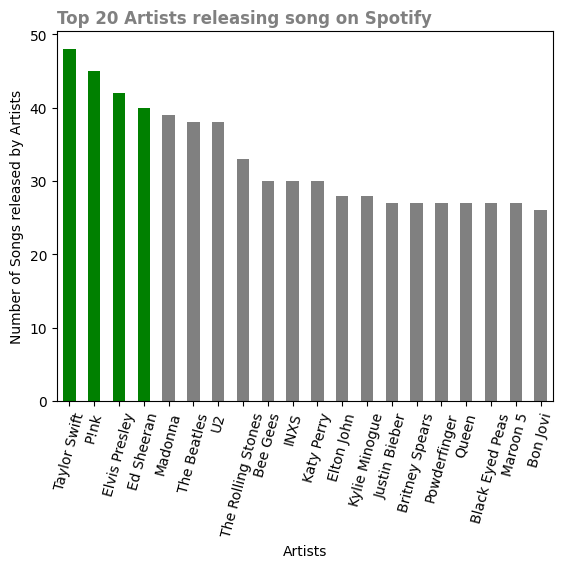

In [13]:
#### Top 20 Artist by number of songs released
top20_artists=raw_data.groupby(by='Artist Name(s)')['Artist Name(s)'].count().sort_values(ascending=False)[:20]
colors = ['green'] * 4 + ['gray'] * (len(top20_artists) - 4)
top20_artists.plot(kind='bar', color=colors)  # Highlight first 5 bars in red
plt.title("Top 20 Artists releasing song on Spotify",loc='left',color='gray',fontweight='bold')
plt.xlabel("Artists")
plt.xticks(rotation=75)
plt.ylabel("Number of Songs released by Artists")
plt.show()
## We have highlighted top 4 singers who created more than 40 songs ( Taylor Shift,Pink,Elvis Presley, Ed Sheeran)

In [15]:
print(raw_data.columns)

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights', 'ReleaseYear'],
      dtype='object')


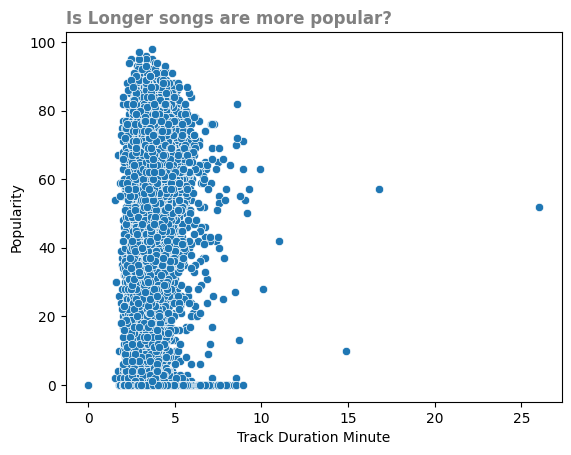

In [16]:
#### Long Duration songs are more popular?
raw_data['Track Duration Minute']=raw_data['Track Duration (ms)']/60000  ##First convert the Duration from Millisecond to Second
sns.scatterplot(data=raw_data,y='Popularity',x='Track Duration Minute')
plt.title("Is Longer songs are more popular?",loc='left',color='gray',fontweight='bold')
plt.show()
## Most of the songs are of around 5 minutes, There are some unpopular song as well whose popularity is 0
## It is hard to tell if short/long duration songs are more popular

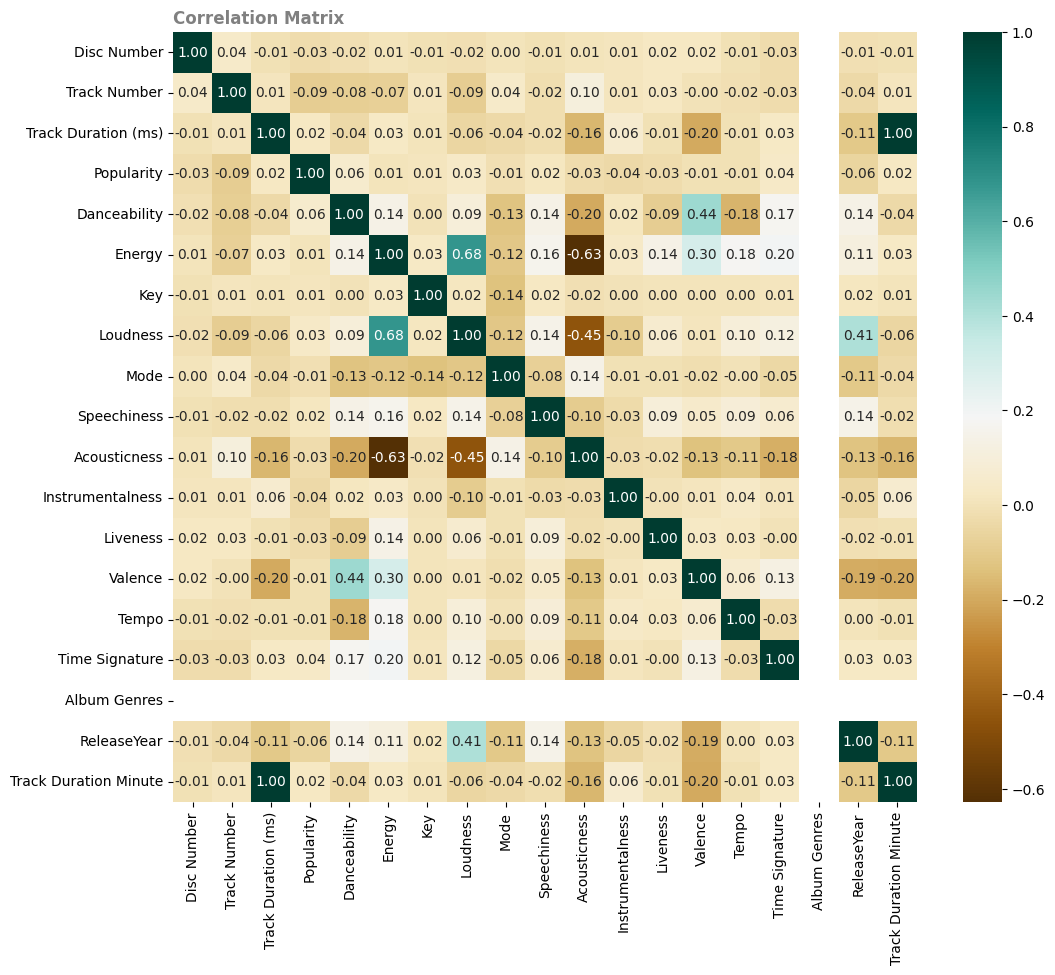

In [17]:
#### Checking the correlation matrix of the numerical columns
plt.figure(figsize=(12,10))
sns.heatmap(raw_data.select_dtypes(include='number').corr(),cmap='BrBG',annot=True,fmt='.2f')
plt.title("Correlation Matrix",loc='left',color='gray',fontweight='bold')
plt.show()
## Column such as Loudness and Accoustiness are negative correlated.
## Danceability and Valence are positive correlated
## ReleaseYear and Loudness is positively correlated, seems like over the year song are getting louder. Let's check it
## Energy is correlated with Loudness

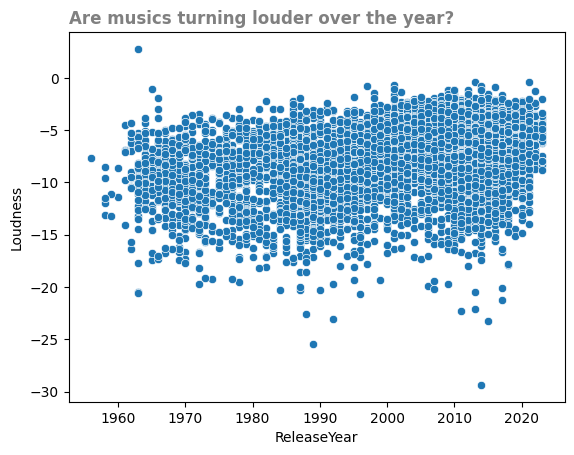

In [18]:
sns.scatterplot(data=raw_data,x='ReleaseYear',y='Loudness')
plt.title("Are musics turning louder over the year?",loc='left',color='gray',fontweight='bold')
plt.show()
## We do see a upward trend over the year.

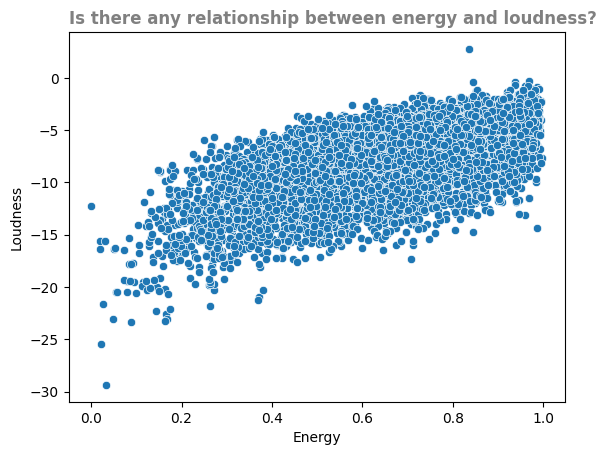

In [19]:
sns.scatterplot(data=raw_data,x='Energy',y='Loudness')
plt.title("Is there any relationship between energy and loudness?",loc='left',color='gray',fontweight='bold')
plt.show()
## We do see a linear relationship between these 2 columns

In [20]:
#### Creating new column  ReleaseYearFlag which flag if the song was released Before 2000 or after
raw_data['ReleaseYearFlag']=np.where(raw_data['ReleaseYear']<2000,'Before2000','After2000')

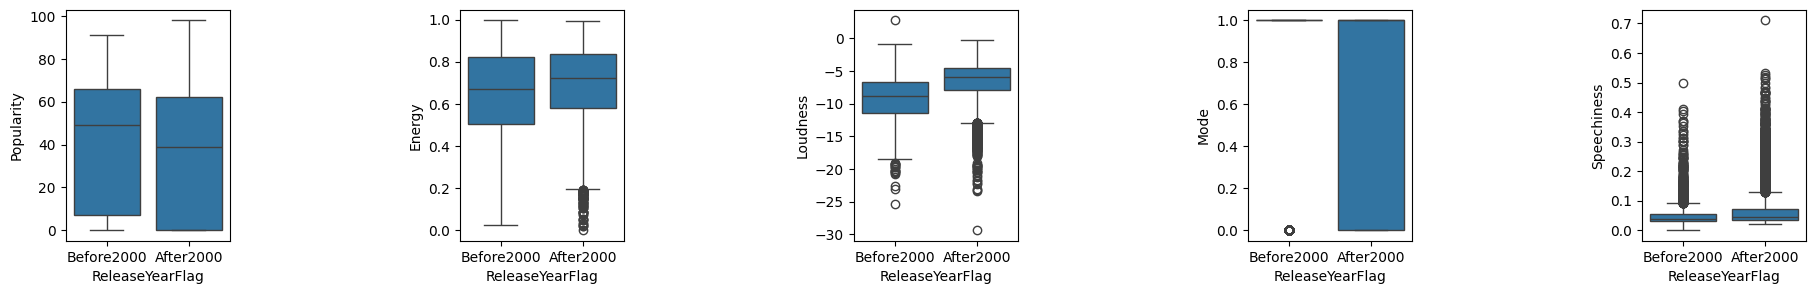

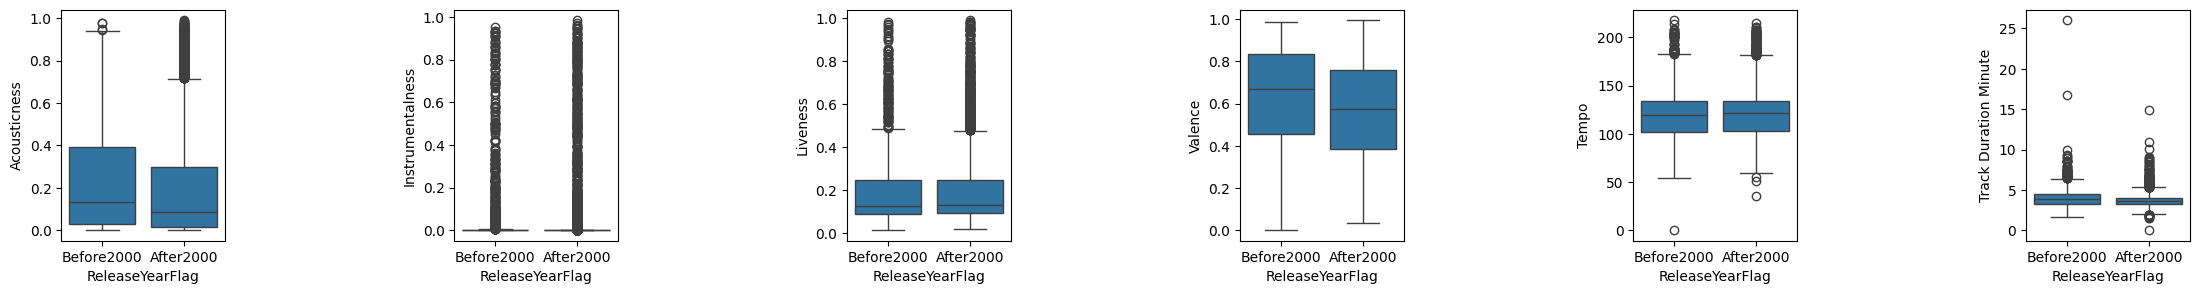

In [21]:
##### Comparing how music flavour changed before and after year 2000
cols=['Popularity','Energy','Loudness','Mode','Speechiness']
plt.figure(figsize=(25,3))
row=1
col=len(cols)*2
k=0
for i in range(1,col,2):
    plt.subplot(row,col,i)
    sns.boxplot(data=raw_data,y=cols[k],x='ReleaseYearFlag')
    k+=1                   
plt.show()

print("\n")

cols=['Acousticness','Instrumentalness','Liveness','Valence','Tempo','Track Duration Minute']
plt.figure(figsize=(30,3))
row=1
col=len(cols)*2
k=0
for i in range(1,col,2):
    plt.subplot(row,col,i)
    sns.boxplot(data=raw_data,y=cols[k],x='ReleaseYearFlag')
    k+=1                   
plt.show()

#### Popularity declined after 2000
#### Energy in the new song increased
#### Loudness increased in new songs
#### Mode turned ON in new songs
#### Speechiness increased in new songs
#### Acousticness decreased in newer songs
#### Valence descreased in new songs
#### Tempand track duration remained as it is

#### It is plausible that the stated reasons play a role in the present downtrend of newer song popularity.